In [7]:
%matplotlib inline
import numpy as np
import scipy.ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import pandas as pd
import dask
import os.path
import sh
from __future__ import division
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['contour.negative_linestyle']= 'dashed'

from progress_bar import *
from useful import *
import gradients as gr

global data_dir
data_dir = '/scratch/ap587/dry_data/'

plot_dir = '/scratch/ap587/plots/misc/'
mkdir = sh.mkdir.bake('-p')
mkdir(plot_dir)

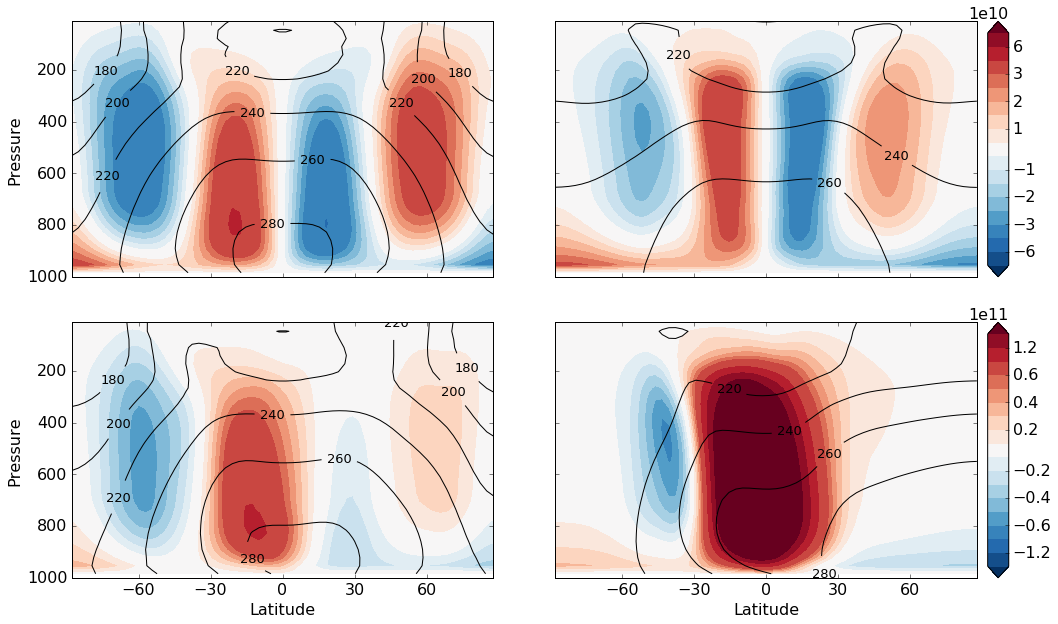

In [9]:
# plot for geoff's model paper

'''
def add_plot(exp, field, ax, season=None, lev=None):
    ds = open_zmean_runset(data_dir, exp)
    ds = ds.isel(time=slice(720,None))
    lag = calc_seasonal_lag(ds.teq)
    if np.isnan(lag):
        lag = 0
    ds.coords['day'] = (ds.day-lag+45)%360
    ds.coords['season'] = np.floor(ds.day/90)
    
    if season is None:
        ds_plot = ds.mean('time')
    else:
        ds_plot = ds.groupby('season').mean('time').isel(season=season)
        
    if field == 'psi':
        ds_plot = ds_plot.psi
        cmap = ''
    elif field == 'temp':
        ds_plot = ds_plot.temp
    
    x = ds.lat.values
    y = ds.pfull.values    
    X, Y = np.meshgrid(x, y)

    
    ax.contourf(X, Y, ds_plot, levels=lev)
'''

hcs = [10]
obls = [10, 40]
exps = []

for hc in hcs:
    for obl in obls:
        exps += ['exp9_hc{:.1f}-obl{:.1f}'.format(hc, obl)]
        
fig, axes = plt.subplots(2, 2, figsize=(15,9), sharey=True, sharex=True)
axes = np.reshape(axes, -1)

tlev = np.arange(180, 320, 20)
psilev = np.array([-15e10, -12e10, -9e10, -6e10,-5e10, -4e10, -3e10, -2e10, -1e10, 1e10, 2e10, 3e10, 4e10,5e10, 6e10, 9e10, 12e10, 15e10])
#psilev = np.arange(-11e10, 12e10, 2e10)


ticks = np.array([-12e10, -6e10, -4e10, -2e10, 2e10, 4e10, 6e10, 12e10])

cax_size = '5%'
pad = 0.15
do_labels = 0

exp = 'exp9_hc10.0-obl10.0'
ax = axes[0]
ds = open_zmean_runset(data_dir, exp)
ds = ds.isel(time=slice(720,None))
lag = calc_seasonal_lag(ds.teq)
if np.isnan(lag):
    lag = 0
ds.coords['day'] = (ds.day-lag+45)%360
ds.coords['season'] = np.floor(ds.day/90)
ds = ds.mean('time')
im = ds.psi.plot.contourf(ax=ax, x='lat', y='pfull', add_colorbar=False, levels=psilev/2, extend='both')
cs = ds.temp.plot.contour(ax=ax, colors='k', add_colorbar=False, levels=tlev)
ax.set_xticks(np.arange(-60,61,30))
ax.set_yticks(np.arange(200, 1001, 200))
ax.set_xlabel('')
ax.set_ylabel('Pressure')
ax.set_title('')
if do_labels:
    ax.text(-80, 100, 'a)', color='k', fontsize=20)
labels = ax.clabel(cs, fmt='%d', fontsize=13)
for l in labels:
    l.set_rotation(0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=cax_size, pad=pad)
plt.gca().set_axis_off()
#fig.colorbar(im, cax=cax, orientation='vertical')

exp = 'exp9_hc10.0-obl40.0'
ax = axes[1]
ds = open_zmean_runset(data_dir, exp)
ds = ds.isel(time=slice(720,None))
lag = calc_seasonal_lag(ds.teq)
if np.isnan(lag):
    lag = 0
ds.coords['day'] = (ds.day-lag+45)%360
ds.coords['season'] = np.floor(ds.day/90)
ds = ds.mean('time')
im = ds.psi.plot.contourf(ax=ax, x='lat', y='pfull', add_colorbar=False, levels=psilev/2, extend='both')
cs = ds.temp.plot.contour(ax=ax, colors='k', add_colorbar=False, levels=tlev)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
if do_labels:
    ax.text(-80, 100, 'b)', color='k', fontsize=20)
labels = ax.clabel(cs, fmt='%d', fontsize=13)
for l in labels:
    l.set_rotation(0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=cax_size, pad=pad)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.set_ticks(ticks/2)

exp = 'exp9_hc10.0-obl10.0'
ax = axes[2]
ds = open_zmean_runset(data_dir, exp)
ds = ds.isel(time=slice(720,None))
lag = calc_seasonal_lag(ds.teq)
if np.isnan(lag):
    lag = 0
ds.coords['day'] = (ds.day-lag+45)%360
ds.coords['season'] = np.floor(ds.day/90)
ds = ds.groupby('season').mean('time').isel(season=1)
im = ds.psi.plot.contourf(ax=ax, x='lat', y='pfull', add_colorbar=False, levels=psilev, extend='both')
cs = ds.temp.plot.contour(ax=ax, colors='k', add_colorbar=False, levels=tlev)
ax.set_xlabel('Latitude')
ax.set_ylabel('Pressure')
ax.set_title('')
if do_labels:
    ax.text(-80, 100, 'c)', color='k', fontsize=20)
labels = ax.clabel(cs, fmt='%d', fontsize=13)
for l in labels:
    l.set_rotation(0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=cax_size, pad=pad)
plt.gca().set_axis_off()
#fig.colorbar(im, cax=cax, orientation='vertical')

exp = 'exp9_hc10.0-obl40.0'
ax = axes[3]
ds = open_zmean_runset(data_dir, exp)
ds = ds.isel(time=slice(720,None))
lag = calc_seasonal_lag(ds.teq)
if np.isnan(lag):
    lag = 0
ds.coords['day'] = (ds.day-lag+45)%360
ds.coords['season'] = np.floor(ds.day/90)
ds = ds.groupby('season').mean('time').isel(season=1)
im = ds.psi.plot.contourf(ax=ax, x='lat', y='pfull', add_colorbar=False, levels=psilev, extend='both')
cs = ds.temp.plot.contour(ax=ax, colors='k', add_colorbar=False, levels=tlev, linewidths=1)
ax.set_xlabel('Latitude')
ax.set_ylabel('')
ax.set_title('')
ax.set_yticks(np.arange(200,1001,200))
if do_labels:
    ax.text(-80, 100, 'd)', color='k', fontsize=20)
labels = ax.clabel(cs, fmt='%d', fontsize=13)
for l in labels:
    l.set_rotation(0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=cax_size, pad=pad)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.set_ticks(ticks)
cbar.formatter.set_powerlimits((2,2))

axes[3].invert_yaxis()
fig.tight_layout()


plt.savefig(plot_dir + 'GMDpaper_nolbl.png', dpi=200,bbox_inches='tight',transparent=False)
plt.savefig(plot_dir + 'GMDpaper_nolbl.pdf', dpi=200,bbox_inches='tight',transparent=False)

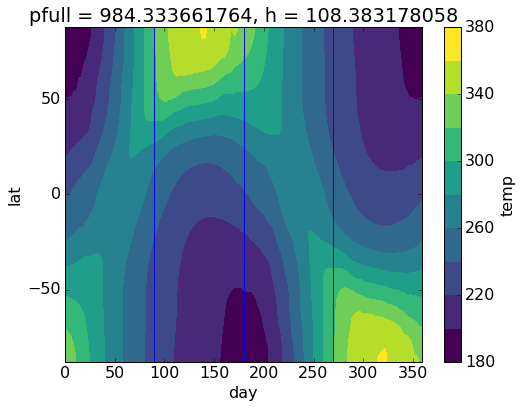

In [45]:
exp = 'exp9_hc10.0-obl80.0'

ds = open_zmean_runset(data_dir, exp)
ds = ds.isel(time=slice(720,None))

lag = calc_seasonal_lag(ds.teq)
if np.isnan(lag):
      lag = 0
ds.coords['day'] = (ds.day-lag+45)%360
ds.coords['season'] = np.floor(ds.day/90)

ds = ds.groupby('day').mean('time')

ds.temp.isel(pfull=-1).plot.contourf(x='day',y='lat', levels=10)

[plt.gca().axvline(x) for x in [90, 180, 270]]

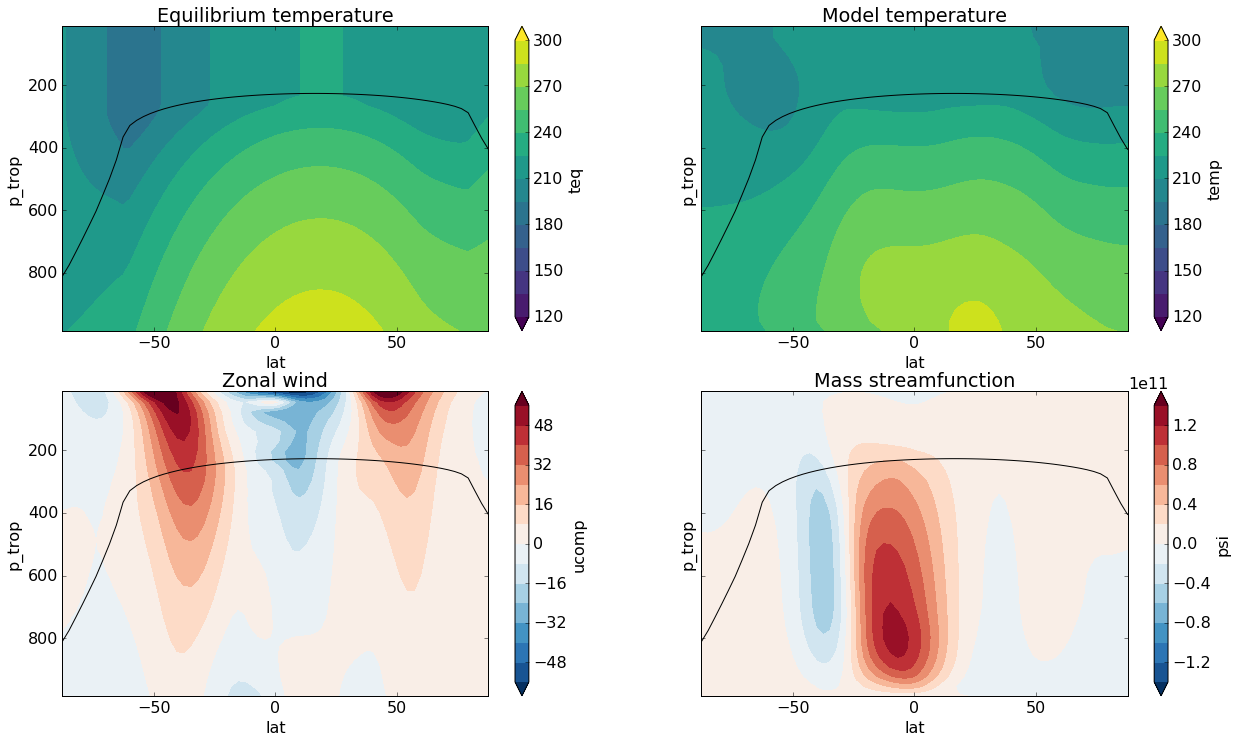

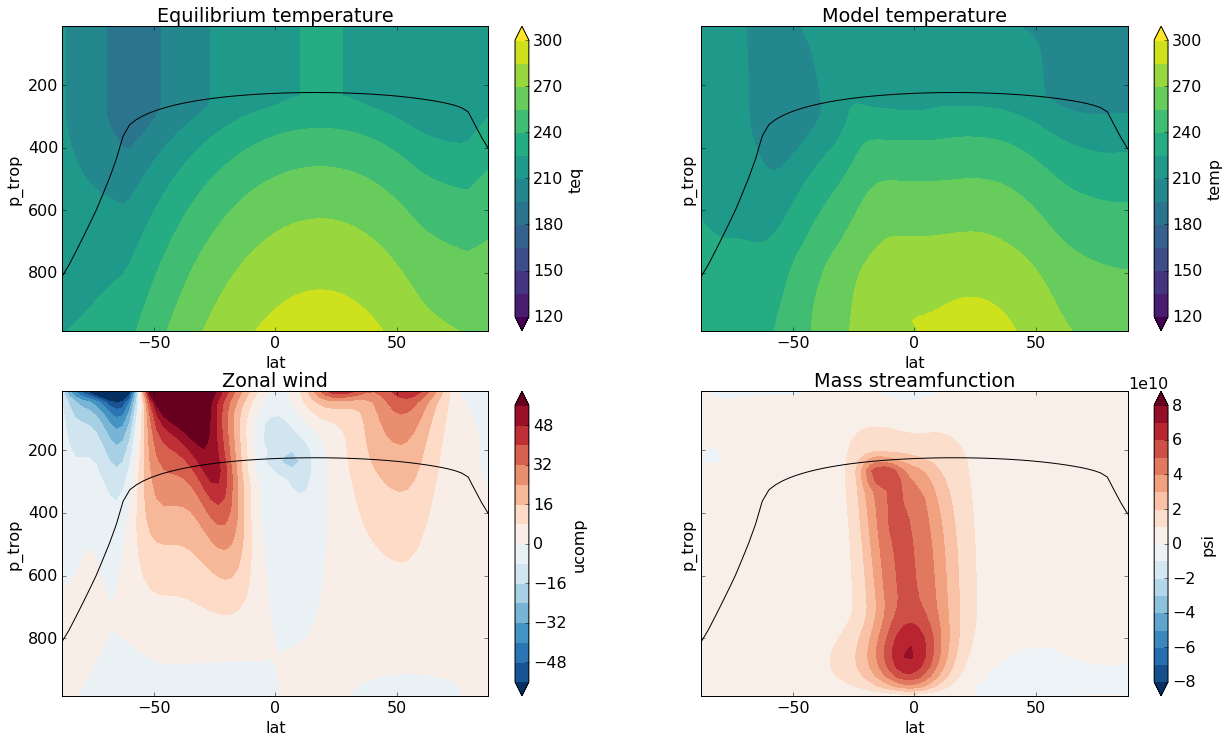

In [19]:
# compare eddy-permitting to zonally symmetric run

exps = ['exp9v1_hc30.0-obl30.0', 'exp12_hc30.0-obl30.0']

day = 26

for exp in exps:
    ds = open_climatology(data_dir,exp)
    if 'quintad' in ds.keys():
        ds.rename({'quintad':'pentad'}, inplace=True)
    plot_grid(ds.isel(pentad=slice(18,36)).mean('pentad'), do_tp=False, vmaxsf=None)
    #fig, ax = plt.subplots()
    #ds.uv_dy.isel(pfull=6).mean('pentad').plot()
    #ds.uw_dp.isel(pfull=6).mean('pentad').plot()
    
    #ds.psi.isel(pentad=day).plot.contourf(x='lat',y='pfull',levels=15)
    ax.invert_yaxis()

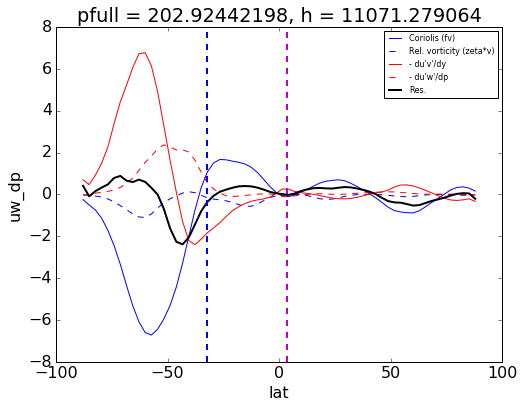

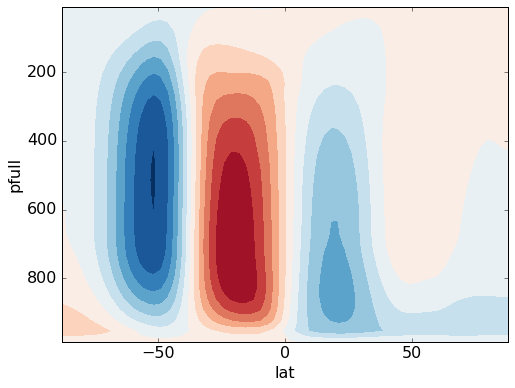

In [16]:
# -- Momentum budget --
exp = 'exp9v1_hc30.0-obl30.0'
#exp = 'exp12_hc30.0-obl30.0'

ds = open_climatology(data_dir, exp)
if 'quintad' in ds.keys():
    ds.rename({'quintad':'pentad'}, inplace=True)
    
lev = 200
time = 62

ds = ds.isel(pentad=slice(36,54)).mean('pentad')

itcz = calc_itcz_lat(ds)
desc = calc_descending_branch(ds)

omega = 7.2921150e-5
f = 2 * omega * np.sin(ds.lat *np.pi/180)
fv = ds.vcomp.sel(pfull=lev,method='nearest') * f * 86400.
abs_vort = (ds.vor + f)*86400.
abs_vortv = (abs_vort * ds.vcomp.sel(pfull=lev,method='nearest'))
vortv = (ds.vor * ds.vcomp).sel(pfull=lev,method='nearest')*86400.


fig, ax = plt.subplots()
fv.plot(ax=ax,label='Coriolis (fv)',color='b')
vortv.plot(ax=ax,label='Rel. vorticity (zeta*v)', color='b', linestyle='--')
ds.uv_dy.sel(pfull=lev,method='nearest').plot(ax=ax,label="- du'v'/dy",color='r')
ds.uw_dp.sel(pfull=lev,method='nearest').plot(ax=ax,label="- du'w'/dp",color='r',linestyle='--')

(fv+vortv+ds.uv_dy.sel(pfull=lev,method='nearest')+ds.uw_dp.sel(pfull=lev,method='nearest')).plot(ax=ax,color='k',label="Res.", linewidth=2)
ax.axvline(itcz, color='m', linestyle='--',linewidth=2)
ax.axvline(desc, color='b', linestyle='--',linewidth=2)

plt.legend(fontsize=8)

fig, ax = plt.subplots()
ds.psi.plot.contourf(x='lat',y='pfull',levels=14,add_colorbar=None)
ax.invert_yaxis()

In [11]:
ds.isel(pfull=6)

<xarray.Dataset>
Dimensions:      (lat: 64, latb: 65, lonb: 129, pentad: 72, phalf: 33, time: 72)
Coordinates:
  * latb         (latb) float64 -90.0 -86.58 -83.76 -80.96 -78.16 -75.36 ...
  * pentad       (pentad) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 ...
  * lonb         (lonb) float64 -1.406 1.406 4.219 7.031 9.844 12.66 15.47 ...
  * phalf        (phalf) float64 0.0 31.25 62.5 93.75 125.0 156.2 187.5 ...
    pfull        float64 202.9
  * lat          (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 ...
    h            float64 1.098e+04
  * time         (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
Data variables:
    ucomp        (pentad, lat) float64 -6.289 -12.96 -16.46 -15.83 -11.44 ...
    uw_dp        (pentad, lat) float64 -0.0001991 -0.0006139 -0.0005351 ...
    vcomp        (pentad, lat) float64 0.03044 0.02661 0.04432 0.1046 0.107 ...
    height       (pentad, lat) float64 1.132e+04 1.128e+04 1.121e+04 ...
    psi          (pentad, lat) fl

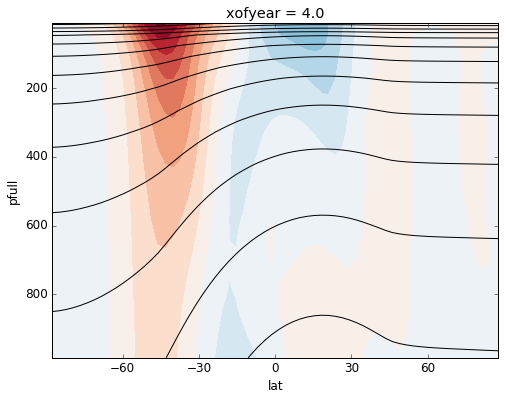

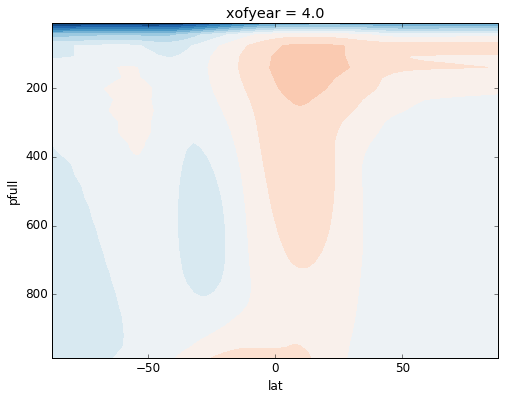

In [67]:
exp = 'exp5_obl45.0'
#exp = 'exp2_hc50.0'
ds = open_zmean_runset('/scratch/ap587/dry_data/', exp)
ds = ds.isel(time=slice(720,None))
lag = calc_seasonal_lag(ds.teq)
ds.coords['xofyear'] = np.mod( ds.time+45+lag, 360.) //90 + 1
ds = ds.groupby('xofyear').mean('time')


ds.teq.isel(xofyear=3).plot.contour(x='lat',y='pfull',levels=15,colors='k',add_colorbar=False)
ds.ucomp.isel(xofyear=3).plot.contourf(x='lat',y='pfull',levels=21,add_colorbar=False)
plt.gca().invert_yaxis()
plt.gca().set_xticks(np.arange(-60,61,30))

fig,ax = plt.subplots()
(ds.teq-ds.temp).isel(xofyear=3).plot.contourf(x='lat',y='pfull',levels=21,add_colorbar=False)
ax.invert_yaxis()

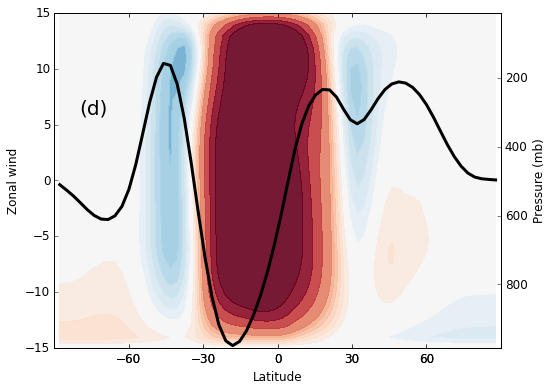

In [56]:
fig, ax1 = plt.subplots()

levels = [-15e10, -12e10, -9e10, -6e10,-5e10, -4e10, -3e10, -2e10,
          -1e10, 1e10, 2e10, 3e10, 4e10,5e10, 6e10, 9e10, 12e10, 15e10]
        
x = ds.lat.values
y = ds.pfull.values #np.linspace(-8,8,len(data.pfull.values))
X,Y = np.meshgrid(x,y)
psi = ds.psi.isel(xofyear=3)
#psi = np.tile(psi,(len(y),1)) only use if want to fill with one pressure level
cs = ax1.contourf(X, Y, psi, levels, cmap='RdBu_r', alpha=0.9, add_colorbar=False, extend='both')
cs.set_clim([-15e10,15e10])
ax1.yaxis.set_label_position('right')
ax1.set_ylabel('Pressure (mb)')
ax1.invert_yaxis()
ax1.yaxis.tick_right()

ax2 = fig.add_subplot(111,sharex=ax1,frameon=False)

ax2.yaxis.tick_left()
f1 = ds.ucomp.isel(xofyear=i).isel(pfull=-1).plot(ax=ax2,color='k',label='ucomp',lw=3)

ax2.set_title('')
        
ax2.set_ylabel('')
ax2.set_xlabel('Latitude')
ax2.set_xticks(np.arange(-60,61,30))
ax2.set_xlim([-90,90])
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Zonal wind')
        
ax2.text(-80,6, '(d)', color='k', fontsize=20)

74
56
76
76


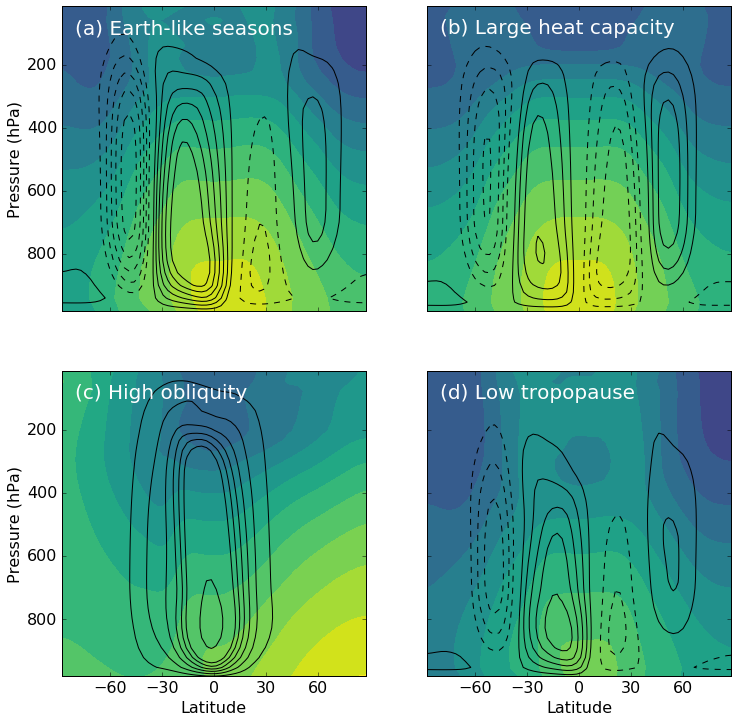

In [3]:
# plot the temperatures and mass streamfunction for four S-W experiments to show possiblities
exps = ['exp2_hc50.0', 'exp4_HS_hc2000.0', 'exp5_obl60.0', 'exp8-ml50_tau0.1']
exps = ['exp2_hc50.0', 'exp4_HS_hc2000.0', 'exp9_hc50.0-obl60.0', 'exp8-ml50_tau0.1']

levels = np.append(np.linspace(-9e10,-5e10,3),np.linspace(-3e10,3e10,9))
levels = np.append(levels, np.linspace(5e10,9e10,3))
levels = [-1e20,-15e10, -12e10, -9e10, -6e10,-5e10, -4e10, -3e10, -2e10, -1e10, 1e10, 2e10, 3e10, 4e10,5e10, 6e10, 9e10, 12e10, 15e10,1e20]


tlevels = np.arange(150,301,10)
plot_labels = ['(a) Earth-like seasons', '(b) Large heat capacity', 
               '(c) High obliquity', '(d) Low tropopause']

fig, axs = plt.subplots(2,2,figsize=(12,12),dpi=200, sharey=True, sharex=True)
for i, ax in enumerate(axs.reshape(-1)):
    ds = open_zmean_runset(data_dir, exps[i])
    ds = ds.isel(time=slice(720,None))
    
    x = ds.lat.values
    y = ds.pfull.values
    X,Y = np.meshgrid(x,y)
        
    lag = calc_seasonal_lag(ds.teq)
    print lag
    summer = np.arange(45,135) + lag
    ds = ds.groupby('day').mean('time')
    ds.temp.isel(day=summer).mean('day').plot.contourf(x='lat',y='pfull',ax=ax,levels=tlevels,
                                                          add_colorbar=False,cmap='viridis')
    ax.contour(X,Y,ds.psi.isel(day=summer).mean('day'),levels=levels,
               colors='k',add_colorbar=False, lw=3)
    #ds.p_trop.isel(day=summer).mean('day').plot.line(ax=ax,color='r')
    #ds.psi.isel(day=summer).mean('day').plot.contour(x='lat',y='pfull',ax=ax, levels=levels,
    #                                                  colors='k',add_colorbar=False)

    ax.set_xticks(np.arange(-60,61,30))
    ax.set_xlabel('')
    ax.set_ylabel('')
    if i in [0,2]:
        ax.set_ylabel('Pressure (hPa)')
    if i in [2,3]:
        ax.set_xlabel('Latitude')

    ax.text(-80,100, plot_labels[i], color='w', fontsize=20)
    
ax.invert_yaxis()
plt.savefig(plot_dir + 'fig2_summers_latpfull.png', dpi=200,bbox_inches='tight',transparent=True)

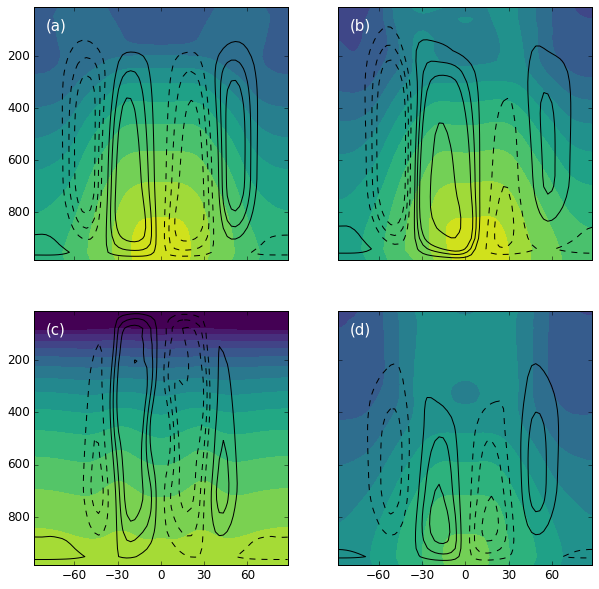

In [3]:
# plot the temperatures and mass streamfunction for four experiments to show possiblities in the model
exps = ['exp4_HS_hc2000.0', 'exp2_hc50.0', 'exp5_obl60.0', 'exp8_tau0.1']

levels = np.append(np.linspace(-9e10,-5e10,3),np.linspace(-3e10,3e10,9))
levels = np.append(levels, np.linspace(5e10,9e10,3))
levels = [-12e10, -9e10, -6e10, -3e10, -2e10, -1e10, 1e10, 2e10, 3e10, 6e10, 9e10, 12e10]

tlevels = np.arange(150,301,10)
plot_labels = ['(a)', '(b)', '(c)', '(d)']

fig, axs = plt.subplots(2,2,figsize=(10,10),dpi=200, sharey=True, sharex=True)
for i, ax in enumerate(axs.reshape(-1)):
    ds = open_zmean_runset(data_dir, exps[i])
    ds = ds.isel(time=slice(720,None))
    
    x = ds.lat.values
    y = ds.pfull.values
    X,Y = np.meshgrid(x,y)
        
    if exps[i] == 'exp2_hc50.0':
        lag = calc_seasonal_lag(ds.teq)
        summer = np.arange(135,225)# + lag
        ds = ds.groupby('day').mean('time')
        ds.temp.isel(day=summer).mean('day').plot.contourf(x='lat',y='pfull',ax=ax,levels=tlevels,
                                                          add_colorbar=False,cmap='viridis')
        ax.contour(X,Y,ds.psi.isel(day=summer).mean('day'),levels=levels,
                    colors='k',add_colorbar=False)
        #ds.psi.isel(day=summer).mean('day').plot.contour(x='lat',y='pfull',ax=ax, levels=levels,
        #                                                  colors='k',add_colorbar=False)
    else:
        ds.temp.mean('time').plot.contourf(x='lat',y='pfull',ax=ax,levels=tlevels,
                                           add_colorbar=False,cmap='viridis')
        ax.contour(X,Y,ds.psi.mean('time'),levels=levels,colors='k',add_colorbar=False)
    ax.set_xticks(np.arange(-60,61,30))
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(-80,100, plot_labels[i], color='w', fontsize=15)
    
ax.invert_yaxis()
plt.savefig(plot_dir + 'fig2_latpfull.png', dpi=200)

In [5]:
exps = ['exp4_HS_hc2000.0', 'exp2_hc50.0', 'exp5_obl60.0', 'exp8_tau0.1']
for i in range(4):
    #plt.subplots(figsize=(20,8),dpi=200)
    ds = open_runset(data_dir,exps[i],range(9,100))
    ds.time.data = ds.time.data/24 - 1
    ds.coords['day'] = ds.time%360
    


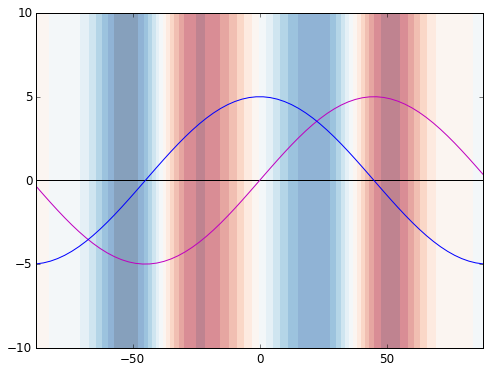

In [56]:
exp = 'exp4_HS_hc2000.0'
ds = open_zmean_runset(data_dir,exp)
ds = ds.isel(time=slice(720,None))
plt.subplots()
x = ds.lat.values
y = np.linspace(-10,10,2)
X,Y = np.meshgrid(x,y)

psi = ds.psi.sel(pfull=500,method='nearest').mean('time')
plt.contourf(X,Y,np.tile(psi,(len(y),1)),15,cmap='RdBu_r',alpha=0.5)
plt.axhline(0,color='k',lw=1)
plt.plot(x,5*np.sin(2*x*np.pi/180), 'm')
plt.plot(x,5*np.cos(2*x*np.pi/180), 'b')



76


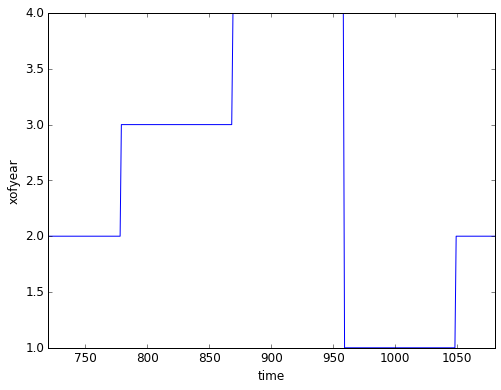

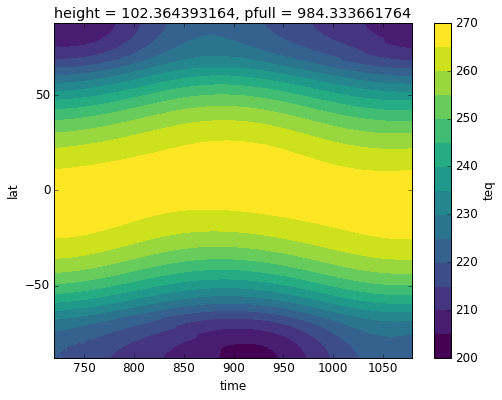

In [9]:
ds = open_zmean_runset(data_dir,exps[3])
ds = ds.isel(time=slice(720,None))
lag = calc_seasonal_lag(ds.teq)
print lag
ds.coords['xofyear'] = np.mod( ds.time+45+lag, 360.) //90 + 1
ds.xofyear.plot()
plt.gca().set_xlim([720,1080])
plt.subplots()
ds.teq.isel(pfull=-1).isel(time=slice(0,360)).plot.contourf(x='time',y='lat',levels=15)

In [ ]:

fig1, ax1 = plt.subplots()
exp = 'exp1_HS1.0'
ds_hs = open_zmean_runset(data_dir,exp)
ds_hs = ds_hs.isel(time=slice(720,None))
ds_hs.groupby('day').mean('time').teq.isel(pfull=-1).plot.contourf(x='day',y='lat',levels=15,ax=ax1)
ax1.set_title('')
ax1.set_xticks(np.arange(45,316,45))
ax1.set_yticks(np.arange(-60,61,30))
plt.grid()

fig2, ax2 = plt.subplots()
exp = 'exp2_hc50.0'
ds = open_zmean_runset(data_dir,exp)
ds = ds.isel(time=slice(720,None))
ds.groupby('day').mean('time').teq.isel(pfull=-1).plot.contourf(x='day',y='lat',levels=15,ax=ax2)
#ds.groupby('day').mean('time').teq.isel(pfull=-1).plot.contour(x='day',y='lat',levels=11,ax=ax2, colors='k', add_colorbar=False)
ax2.set_title('')
ax2.set_yticks(np.arange(-60,61,30))
ax2.set_xticks(np.arange(45,316,45))
plt.grid()

In [ ]:
exp = 'exp2_hc50.0'
ds_zmean = open_zmean_runset(data_dir,exp)
ds_zmean = ds_zmean.isel(time=slice(720,None))
ds = open_runset(data_dir,exp,runs=range(9,100))
ds.time.data = ds.time.data/24 - 1
ds.coords['day'] = ds.time%360 
ds['emf'] = (('time','pfull','lat','lon'), -86400. * gr.ddx( (ds.ucomp_sq - ds.ucomp**2)))
ds = ds.mean('lon')

dsg = ds_zmean.groupby('day').mean('time')
dsfg = ds.groupby('day').mean('time')
winter = np.arange(135,225)
equinox = np.append(np.arange(225,315), np.arange(45,135))

fig,ax = plt.subplots()
dsg.psi.isel(day=winter).mean('day').plot.contourf(x='lat',y='pfull',ax=ax,levels=15)
dsfg.emf.isel(day=winter).mean('day').plot.contour(x='lat',y='pfull',ax=ax,color='k', levels=11)
ax.invert_yaxis()
ax.set_xticks(np.arange(-60,61,30))
plt.grid()

fig,ax = plt.subplots()
dsg.psi.isel(day=equinox).mean('day').plot.contourf(x='lat',y='pfull',ax=ax,levels=15)
dsfg.emf.isel(day=equinox).mean('day').plot.contour(x='lat',y='pfull',ax=ax,color='k', levels=11)
ax.invert_yaxis()
ax.set_xticks(np.arange(-60,61,30))
plt.grid()

In [ ]:
print ds